## Shopify Technical Challenge Question 1
### Jun Jie Goh 

In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
import datetime
from scipy import stats
import numpy as np

In [8]:
df = pd.read_csv("shopify.csv", index_col="order_id")

In [9]:
df.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,3/13/2017 12:36
2,92,925,90,1,cash,3/3/2017 17:38
3,44,861,144,1,cash,3/14/2017 4:23
4,18,935,156,1,credit_card,3/26/2017 12:43
5,18,883,156,1,credit_card,3/1/2017 4:35


## a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

Before doing any calculations, I created a new column to calculate the price per item to observe if any of the shoes has an abnormal price. Since the question stated that these shops one sells one model per shoe, they all should be relatively the same price. I used a z-score method; if data points are too far from 0 they will be treated as outliers - in this case, a value of more than 3 or less than -3. I observed that an item has a price of $25725, which is way too expensive for a pair of shoes and I removed it from the dataset. 

Currently, the average order value (AOV) is calculated by taking the mean of the 'order_amount' column. This calculation did not factor in the number of items purchased. For example, a customer have bought 2000 pairs of shoes that costs a total of $704000 on multiple occasions throughout the month. 

This act of buying in bulk on multiple occasions has created outliers in the dataset, resulting in the high AOV when number of items purchased is not considered. A better way of evaluating this is to sum the 'order_amount' and divide it by the total number of sales resulting in a value of $307.

Code is as follows:

In [10]:
# AOV without number of sales considered 
df["order_amount"].mean()

3145.128

In [39]:
# Create new column to calculate price per item
df["price_per_item"] = df["order_amount"]/df["total_items"]


In [28]:
# Identify outliers using z-score
outliers=[]
def outlier_func(input_data):
    
    threshold=3
    mean_value = np.mean(input_data)
    std_value =np.std(input_data)
    
    
    for obs in input_data:
        z_score= (obs - mean_value)/std_value
        if np.abs(z_score) > threshold:
            outliers.append(obs)
    return outliers

print(outlier_func(df["price_per_item"]))

[25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0, 25725.0]


In [37]:
# Remove the outliers 
df_clean = df[df["price_per_item"] < 25725]

In [38]:
# AOV with number of sales considered 
sum_order = df_clean["order_amount"].sum()
sum_count = df_clean["total_items"].sum()
print(sum_order/sum_count)

307.01149425287355


## b. What metric would you report for this dataset? 
I would use AOV per day. This will allow us to look at the AOV on a more granular scale and identify which day/dates has the highest AOV. If a certain trend exists in the data, this information could then be utilized for more actionable and marketing insights.

## c. What is its value?

The value for AOV per day is calculated in a table and graphed out below.
Code is as follows:

In [67]:
# Remove timestamp on 'created_at' column
df_clean["created_at"] = pd.to_datetime(df_clean["created_at"], errors='coerce').dt.date
#df_clean["created_at"] = df_clean["created_at"].dt.date

<ipython-input-67-329e6050de13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["created_at"] = pd.to_datetime(df_clean["created_at"], errors='coerce').dt.date


In [57]:
df_aov = df_clean[['created_at','order_amount','total_items']].groupby(['created_at']).sum().eval('AOV_per_day = order_amount/total_items')
df_aov

,order_amount,total_items,AOV_per_day
created_at,,,
2017-03-01,54704,357,153.232493
2017-03-02,1459484,4346,335.822365
2017-03-03,48729,324,150.398148
2017-03-04,752604,2309,325.943699
2017-03-05,49118,317,154.946372
2017-03-06,42266,277,152.584838
2017-03-07,1465850,4378,334.821836
2017-03-08,43432,287,151.331010
2017-03-09,62662,414,151.357488


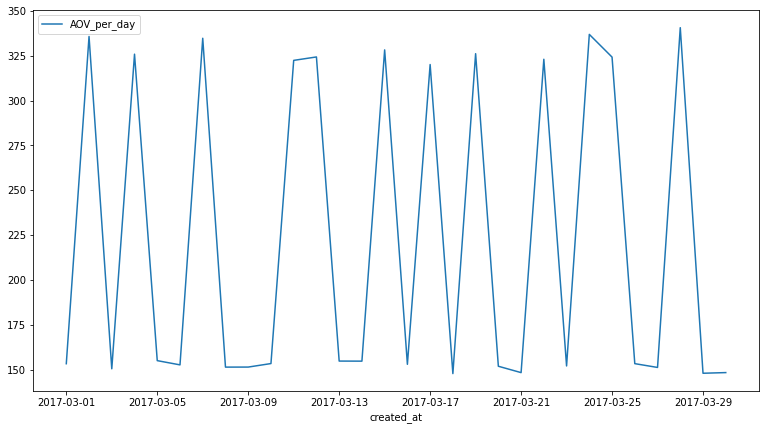

In [66]:
# Visualizing 
df_aov.reset_index().plot(x='created_at', y='AOV_per_day', figsize=(13, 7))